# Normalização do Dataframe

### Importando as principais bibliotecas

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Leitura do csv

In [29]:
# extraindo data set e printando os 5 primeiros e 5 ultimos dados junto com as dimensoes
main_df = pd.read_csv("https://raw.githubusercontent.com/gabrielaragao01/Data-Science-Project/main/code/first-steps/matches_info_df.csv", index_col=0)
matches_info_df = main_df.copy()

In [30]:
# Filtrando colunas que são do tipo 'object'
object_columns = matches_info_df.select_dtypes(include=['object', 'bool']).columns

# Imprimindo os nomes das colunas do tipo 'object'
print(object_columns)

Index(['home_team_name', 'away_team_name', 'home_team_goal_timings',
       'away_team_goal_timings', 'season_part', 'day_or_night',
       'home-80-final', 'away-80-final', '80-final', 'referee'],
      dtype='object')


### Ajustando tipos dos dados - Tranformando em dados categoricos

In [31]:
# digo digo e bieli, home_team_goal_timings still being an object cause is not a category, 
# we can not say that cause 43 min goal is not a category, there wont be a category just to 43 min goasl

matches_info_df['home_team_name'] = matches_info_df['home_team_name'].astype('category')
matches_info_df['away_team_name'] = matches_info_df['away_team_name'].astype('category')
matches_info_df['season_part'] = matches_info_df['season_part'].astype('category')
matches_info_df['day_or_night'] = matches_info_df['day_or_night'].astype('category')
matches_info_df['home-80-final'] = matches_info_df['home-80-final'].astype('category')
matches_info_df['away-80-final'] = matches_info_df['away-80-final'].astype('category')
matches_info_df['80-final'] = matches_info_df['80-final'].astype('category')
matches_info_df['referee'] = matches_info_df['referee'].astype('category')
matches_info_df.dtypes

result                                     int64
performance_rank_home                      int64
home_team_name                          category
B365H                                    float64
B365D                                    float64
B365A                                    float64
away_team_name                          category
away_performance_rank                      int64
Pre-Match PPG (Home)                     float64
Pre-Match PPG (Away)                     float64
home_team_goal_count                       int64
away_team_goal_count                       int64
home_team_goal_count_half_time             int64
home_team_goal_count_secondhalf_time       int64
away_team_goal_count_half_time             int64
away_team_goal_count_secondhalf_time       int64
home_team_goal_timings                    object
away_team_goal_timings                    object
home_team_shots                            int64
home_team_shots_on_target_original         int64
home_team_corner_cou

In [32]:
# Usando o cat codes ele tava vindo com uma ordem 0, 2, 1
codes, unique = pd.factorize(matches_info_df['season_part'])

# Convertendo os códigos para int8
matches_info_df['season_part'] = codes.astype('int8')
matches_info_df['home_team_name'] = matches_info_df['home_team_name'].cat.codes
matches_info_df['away_team_name'] = matches_info_df['away_team_name'].cat.codes
matches_info_df['day_or_night'] = matches_info_df['day_or_night'].cat.codes
matches_info_df['home-80-final'] = matches_info_df['home-80-final'].cat.codes
matches_info_df['away-80-final'] = matches_info_df['away-80-final'].cat.codes
matches_info_df['80-final'] = matches_info_df['80-final'].cat.codes
matches_info_df['referee'] = matches_info_df['referee'].cat.codes

# Removendo colunas desnecessárias para calcular a correlação de Spearman perguntar a prof se ta correto
matches_info_df = matches_info_df.drop(['home_team_goal_timings', 'away_team_goal_timings'], axis=1)


matches_info_df.dtypes

result                                    int64
performance_rank_home                     int64
home_team_name                             int8
B365H                                   float64
B365D                                   float64
B365A                                   float64
away_team_name                             int8
away_performance_rank                     int64
Pre-Match PPG (Home)                    float64
Pre-Match PPG (Away)                    float64
home_team_goal_count                      int64
away_team_goal_count                      int64
home_team_goal_count_half_time            int64
home_team_goal_count_secondhalf_time      int64
away_team_goal_count_half_time            int64
away_team_goal_count_secondhalf_time      int64
home_team_shots                           int64
home_team_shots_on_target_original        int64
home_team_corner_count                    int64
home_team_shots_on_target_dirty         float64
away_team_shots                         

In [33]:
matches_info_df

,result,performance_rank_home,home_team_name,B365H,B365D,B365A,away_team_name,away_performance_rank,Pre-Match PPG (Home),Pre-Match PPG (Away),...,home_season_shots,home_season_shots_on_target,referee,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_fouls,away_team_fouls,dirty
0,1,6,13,1.57,3.90,7.50,10,9,0.00,0.00,...,235,145,0,2,0,1,0,11,8,0
1,-1,13,14,3.90,3.50,2.04,16,4,0.00,0.00,...,213,98,11,2,0,2,0,11,12,1
2,2,14,0,1.90,3.60,4.50,4,18,0.00,0.00,...,191,100,8,1,0,1,0,11,9,0
3,-2,19,8,2.50,3.40,3.00,6,12,0.00,0.00,...,223,101,13,1,0,2,0,9,11,0
4,-3,20,9,6.50,4.00,1.61,5,3,0.00,0.00,...,169,77,3,2,0,1,0,9,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2,2,11,1.30,6.00,11.00,19,7,2.78,1.28,...,267,145,11,0,0,2,0,3,11,0
376,-2,6,13,1.28,6.50,11.00,4,18,2.00,0.61,...,235,145,7,3,0,3,0,9,6,0
377,0,16,15,1.44,4.75,8.50,9,20,1.22,0.33,...,207,108,10,0,0,1,0,8,6,0
378,0,4,16,2.20,3.50,3.50,7,8,2.06,1.06,...,236,124,0,0,0,2,0,10,13,0


In [34]:
# Listar colunas categóricas e colunas que não devem ser normalizadas
categorical_columns = [
    'home_team_name', 'away_team_name', 'home_team_goal_count_half_time',
    'home_team_goal_count_secondhalf_time', 'away_team_goal_count_half_time',
    'away_team_goal_count_secondhalf_time', 'season_part', 'day_or_night',
    'home-80-final', 'away-80-final', '80-final', 'referee', 'dirty'
]

matches_norm = matches_info_df
# normalizando min-max
# como os dados nao seguem uma normal vou normalizar por min-max
matches_norm = ((matches_norm.drop(columns=categorical_columns) - matches_norm.drop(columns=categorical_columns).min()) / (matches_norm.drop(columns=categorical_columns).max() - matches_norm.drop(columns=categorical_columns).min())*2) -1

# Concatenar as colunas categóricas de volta ao DataFrame normalizado
#matches_norm = pd.concat([matches_norm, matches_info_df[categorical_columns]], axis=1)

# Visualizar os primeiros registros do DataFrame após a concatenação
matches_norm

,result,performance_rank_home,B365H,B365D,B365A,away_performance_rank,Pre-Match PPG (Home),Pre-Match PPG (Away),home_team_goal_count,away_team_goal_count,...,away_team_shots_on_target,away_team_corner_count,home_season_shots,home_season_shots_on_target,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_fouls,away_team_fouls
0,0.090909,-0.473684,-0.953510,-0.871429,-0.680040,-0.157895,-1.000000,-1.000000,-0.333333,-0.666667,...,-0.230769,-0.285714,-0.043478,0.541667,-0.333333,-1.0,-0.6,-1.0,-0.043478,-0.444444
1,-0.272727,0.263158,-0.741112,-0.928571,-0.953862,-0.684211,-1.000000,-1.000000,-0.666667,-0.333333,...,-0.076923,-0.285714,-0.362319,-0.437500,-0.333333,-1.0,-0.2,-1.0,-0.043478,0.000000
2,0.272727,0.368421,-0.923428,-0.914286,-0.830491,0.789474,-1.000000,-1.000000,-0.333333,-1.000000,...,-0.692308,-0.428571,-0.681159,-0.395833,-0.666667,-1.0,-0.6,-1.0,-0.043478,-0.333333
3,-0.454545,0.894737,-0.868733,-0.942857,-0.905717,0.157895,-1.000000,-1.000000,-1.000000,-0.333333,...,0.692308,-0.285714,-0.217391,-0.375000,-0.666667,-1.0,-0.2,-1.0,-0.217391,-0.111111
4,-0.636364,1.000000,-0.504102,-0.857143,-0.975426,-0.789474,-1.000000,-1.000000,-1.000000,0.000000,...,-0.230769,-0.285714,-1.000000,-0.875000,-0.333333,-1.0,-0.6,-1.0,-0.217391,-0.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,0.272727,-0.894737,-0.978122,-0.571429,-0.504514,-0.368421,0.853333,-0.146667,-0.333333,-1.000000,...,-0.538462,-0.857143,0.420290,0.541667,-1.000000,-1.0,-0.2,-1.0,-0.739130,-0.111111
376,-0.454545,-0.473684,-0.979945,-0.500000,-0.504514,0.789474,0.333333,-0.593333,-1.000000,-0.333333,...,-0.230769,-0.714286,-0.043478,0.541667,0.000000,-1.0,0.2,-1.0,-0.217391,-0.666667
377,-0.090909,0.578947,-0.965360,-0.750000,-0.629890,1.000000,-0.186667,-0.780000,-0.666667,-0.666667,...,-0.384615,-0.571429,-0.449275,-0.229167,-1.000000,-1.0,-0.6,-1.0,-0.304348,-0.666667
378,-0.090909,-0.684211,-0.896080,-0.928571,-0.880642,-0.263158,0.373333,-0.293333,-0.333333,-0.333333,...,0.538462,-0.428571,-0.028986,0.104167,-1.000000,-1.0,-0.2,-1.0,-0.130435,0.111111


In [35]:
from sklearn.preprocessing import OneHotEncoder

# Listar colunas categóricas e colunas que não devem ser normalizadas
categorical_columns = [
    'home_team_name', 'away_team_name', 'home_team_goal_count_half_time',
    'home_team_goal_count_secondhalf_time', 'away_team_goal_count_half_time',
    'away_team_goal_count_secondhalf_time', 'season_part', 'day_or_night',
    'home-80-final', 'away-80-final', '80-final', 'referee', 'dirty'
]

# Codificar as colunas categóricas usando a codificação one-hot
# Para variáveis categóricas com várias categorias, 
# converter cada categoria em uma variável binária separada.
encoder = OneHotEncoder()
data_encoded = encoder.fit_transform(main_df[categorical_columns]).toarray()

# Criar um DataFrame com os dados codificados
df_encoded = pd.DataFrame(data_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenar os DataFrames com as colunas codificadas e as colunas não modificadas
df_normalized = pd.concat([matches_norm, df_encoded], axis=1)

df_normalized

,result,performance_rank_home,B365H,B365D,B365A,away_performance_rank,Pre-Match PPG (Home),Pre-Match PPG (Away),home_team_goal_count,away_team_goal_count,...,referee_Lee Probert,referee_Martin Atkinson,referee_Michael Oliver,referee_Mike Dean,referee_Paul Tierney,referee_Roger East,referee_Simon Hooper,referee_Stuart Attwell,dirty_0,dirty_1
0,0.090909,-0.473684,-0.953510,-0.871429,-0.680040,-0.157895,-1.000000,-1.000000,-0.333333,-0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.272727,0.263158,-0.741112,-0.928571,-0.953862,-0.684211,-1.000000,-1.000000,-0.666667,-0.333333,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.272727,0.368421,-0.923428,-0.914286,-0.830491,0.789474,-1.000000,-1.000000,-0.333333,-1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.454545,0.894737,-0.868733,-0.942857,-0.905717,0.157895,-1.000000,-1.000000,-1.000000,-0.333333,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.636364,1.000000,-0.504102,-0.857143,-0.975426,-0.789474,-1.000000,-1.000000,-1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,0.272727,-0.894737,-0.978122,-0.571429,-0.504514,-0.368421,0.853333,-0.146667,-0.333333,-1.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
376,-0.454545,-0.473684,-0.979945,-0.500000,-0.504514,0.789474,0.333333,-0.593333,-1.000000,-0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
377,-0.090909,0.578947,-0.965360,-0.750000,-0.629890,1.000000,-0.186667,-0.780000,-0.666667,-0.666667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
378,-0.090909,-0.684211,-0.896080,-0.928571,-0.880642,-0.263158,0.373333,-0.293333,-0.333333,-0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [36]:
# discretizar a bet
print(sorted(df_normalized['result'].unique()))
# eu nao devia ter normalizado essa bubonica

[-1.0, -0.8181818181818181, -0.6363636363636364, -0.4545454545454546, -0.2727272727272727, -0.09090909090909094, 0.09090909090909083, 0.2727272727272727, 0.4545454545454546, 0.6363636363636365, 0.8181818181818181, 1.0]


In [37]:

# discretizando com 6 bins com mesmo intervalo, perdeu de lavada, perdeu, em
df_normalized['result'] = pd.cut(df_normalized['result'],bins=6)
df_normalized

,result,performance_rank_home,B365H,B365D,B365A,away_performance_rank,Pre-Match PPG (Home),Pre-Match PPG (Away),home_team_goal_count,away_team_goal_count,...,referee_Lee Probert,referee_Martin Atkinson,referee_Michael Oliver,referee_Mike Dean,referee_Paul Tierney,referee_Roger East,referee_Simon Hooper,referee_Stuart Attwell,dirty_0,dirty_1
0,"(0.0, 0.333]",-0.473684,-0.953510,-0.871429,-0.680040,-0.157895,-1.000000,-1.000000,-0.333333,-0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,"(-0.333, 0.0]",0.263158,-0.741112,-0.928571,-0.953862,-0.684211,-1.000000,-1.000000,-0.666667,-0.333333,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,"(0.0, 0.333]",0.368421,-0.923428,-0.914286,-0.830491,0.789474,-1.000000,-1.000000,-0.333333,-1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,"(-0.667, -0.333]",0.894737,-0.868733,-0.942857,-0.905717,0.157895,-1.000000,-1.000000,-1.000000,-0.333333,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,"(-0.667, -0.333]",1.000000,-0.504102,-0.857143,-0.975426,-0.789474,-1.000000,-1.000000,-1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,"(0.0, 0.333]",-0.894737,-0.978122,-0.571429,-0.504514,-0.368421,0.853333,-0.146667,-0.333333,-1.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
376,"(-0.667, -0.333]",-0.473684,-0.979945,-0.500000,-0.504514,0.789474,0.333333,-0.593333,-1.000000,-0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
377,"(-0.333, 0.0]",0.578947,-0.965360,-0.750000,-0.629890,1.000000,-0.186667,-0.780000,-0.666667,-0.666667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
378,"(-0.333, 0.0]",-0.684211,-0.896080,-0.928571,-0.880642,-0.263158,0.373333,-0.293333,-0.333333,-0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [38]:
# multiplicar por menos 1 por ser inversamente proporcional, para nao atrapalhar o knn
df_normalized['performance_rank_home'] = df_normalized['performance_rank_home'] * -1
df_normalized['away_performance_rank'] = df_normalized['away_performance_rank'] * -1


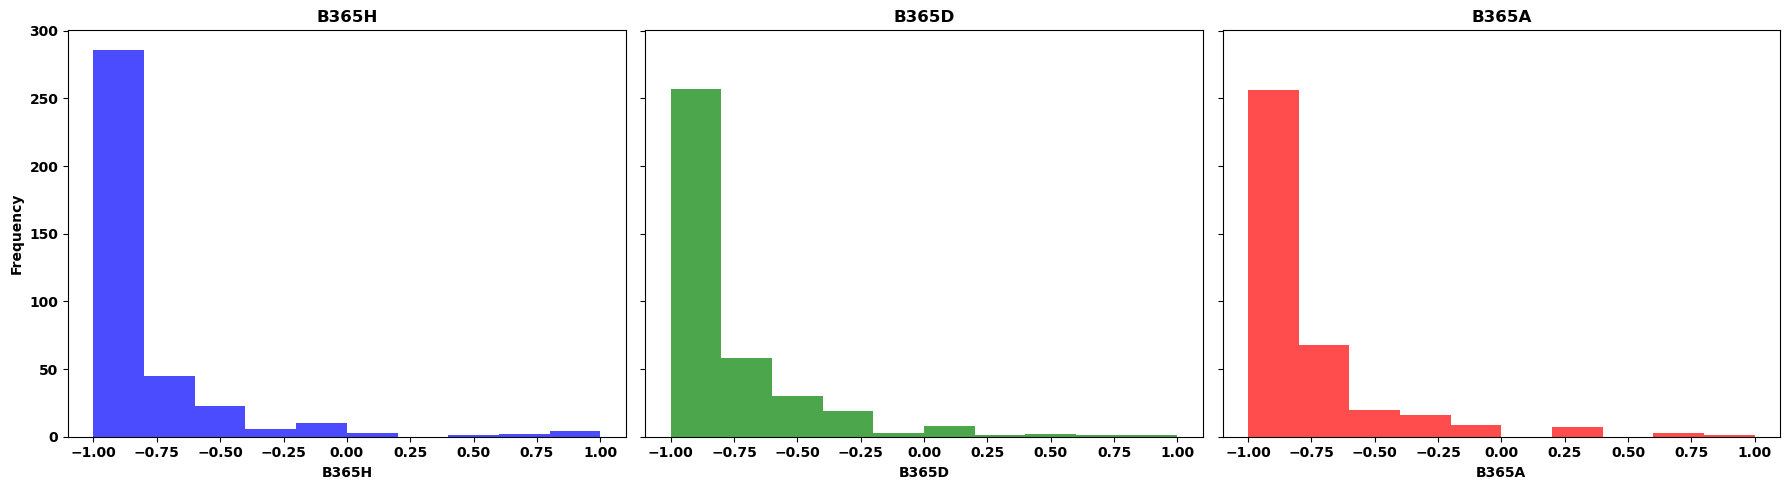

In [39]:
# Criar a figura e os eixos para os subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5), sharey=True, sharex=True)

# Plotar o histograma de B365H
ax1.hist(df_normalized['B365H'], bins=10, color='blue', alpha=0.7)
ax1.set_title('B365H')
ax1.set_xlabel('B365H')
ax1.set_ylabel('Frequency')

# Plotar o histograma de B365D
ax2.hist(df_normalized['B365D'], bins=10, color='green', alpha=0.7)
ax2.set_title('B365D')
ax2.set_xlabel('B365D')

# Plotar o histograma de B365A
ax3.hist(df_normalized['B365A'], bins=10, color='red', alpha=0.7)
ax3.set_title('B365A')
ax3.set_xlabel('B365A')

# Ajustar o layout para que os subplots não se sobreponham
plt.tight_layout()
plt.show()


In [40]:
# como podemos ver segue uma funçao logaritma
# Supondo que df seja seu DataFrame original
# Adicionando 1 para evitar log(0) se houver valores zero
df_normalized['B365H_log'] = np.log1p(df_normalized['B365H'])
df_normalized['B365D_log'] = np.log1p(df_normalized['B365D'])
df_normalized['B365A_log'] = np.log1p(df_normalized['B365A'])
df_normalized

c:\Users\diogo\anaconda3.0\envs\statistics_book\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\diogo\anaconda3.0\envs\statistics_book\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\diogo\anaconda3.0\envs\statistics_book\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


,result,performance_rank_home,B365H,B365D,B365A,away_performance_rank,Pre-Match PPG (Home),Pre-Match PPG (Away),home_team_goal_count,away_team_goal_count,...,referee_Mike Dean,referee_Paul Tierney,referee_Roger East,referee_Simon Hooper,referee_Stuart Attwell,dirty_0,dirty_1,B365H_log,B365D_log,B365A_log
0,"(0.0, 0.333]",0.473684,-0.953510,-0.871429,-0.680040,0.157895,-1.000000,-1.000000,-0.333333,-0.666667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-3.068509,-2.051271,-1.139560
1,"(-0.333, 0.0]",-0.263158,-0.741112,-0.928571,-0.953862,0.684211,-1.000000,-1.000000,-0.666667,-0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.351360,-2.639057,-3.076109
2,"(0.0, 0.333]",-0.368421,-0.923428,-0.914286,-0.830491,-0.789474,-1.000000,-1.000000,-0.333333,-1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-2.569518,-2.456736,-1.774852
3,"(-0.667, -0.333]",-0.894737,-0.868733,-0.942857,-0.905717,-0.157895,-1.000000,-1.000000,-1.000000,-0.333333,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-2.030521,-2.862201,-2.361456
4,"(-0.667, -0.333]",-1.000000,-0.504102,-0.857143,-0.975426,0.789474,-1.000000,-1.000000,-1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.701385,-1.945910,-3.706078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,"(0.0, 0.333]",0.894737,-0.978122,-0.571429,-0.504514,0.368421,0.853333,-0.146667,-0.333333,-1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-3.822281,-0.847298,-0.702215
376,"(-0.667, -0.333]",0.473684,-0.979945,-0.500000,-0.504514,-0.789474,0.333333,-0.593333,-1.000000,-0.333333,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-3.909292,-0.693147,-0.702215
377,"(-0.333, 0.0]",-0.578947,-0.965360,-0.750000,-0.629890,-1.000000,-0.186667,-0.780000,-0.666667,-0.666667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-3.362748,-1.386294,-0.993954
378,"(-0.333, 0.0]",0.684211,-0.896080,-0.928571,-0.880642,0.263158,0.373333,-0.293333,-0.333333,-0.333333,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-2.264136,-2.639057,-2.125627


ValueError: supplied range of [-inf, 0.6931471805599453] is not finite

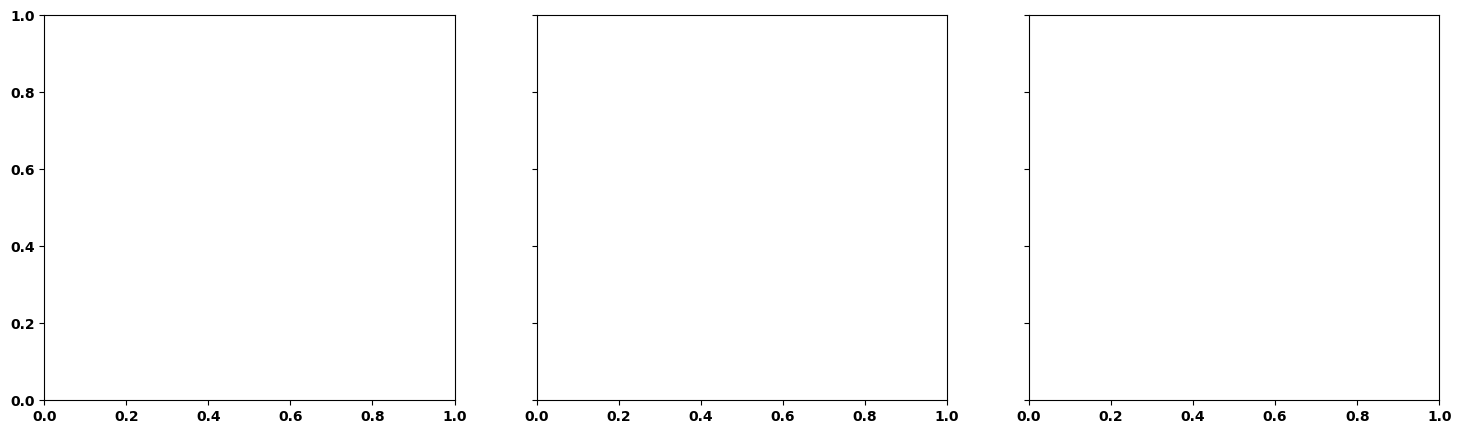

In [41]:
# Criar a figura e os eixos para os subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5), sharey=True, sharex=True)

# Plotar o histograma de B365H
ax1.hist(df_normalized['B365H_log'], bins=10, color='blue', alpha=0.7)
ax1.set_title('B365H_log')
ax1.set_xlabel('B365H_log')
ax1.set_ylabel('Frequency')

# Plotar o histograma de B365D
ax2.hist(df_normalized['B365D_log'], bins=10, color='green', alpha=0.7)
ax2.set_title('B365D')
ax2.set_xlabel('B365D')

# Plotar o histograma de B365A
ax3.hist(df_normalized['B365A_log'], bins=10, color='red', alpha=0.7)
ax3.set_title('B365A')
ax3.set_xlabel('B365A')

# Ajustar o layout para que os subplots não se sobreponham
plt.tight_layout()
plt.show()


In [ ]:
matches_norm.to_csv('normalizaded_matches.csv')
matches_norm

,result,performance_rank_home,B365H,B365D,B365A,away_performance_rank,Pre-Match PPG (Home),Pre-Match PPG (Away),home_team_goal_count,away_team_goal_count,...,away_team_shots_on_target,away_team_corner_count,home_season_shots,home_season_shots_on_target,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_fouls,away_team_fouls
0,0.090909,-0.473684,-0.953510,-0.871429,-0.680040,-0.157895,-1.000000,-1.000000,-0.333333,-0.666667,...,-0.230769,-0.285714,-0.043478,0.541667,-0.333333,-1.0,-0.6,-1.0,-0.043478,-0.444444
1,-0.272727,0.263158,-0.741112,-0.928571,-0.953862,-0.684211,-1.000000,-1.000000,-0.666667,-0.333333,...,-0.076923,-0.285714,-0.362319,-0.437500,-0.333333,-1.0,-0.2,-1.0,-0.043478,0.000000
2,0.272727,0.368421,-0.923428,-0.914286,-0.830491,0.789474,-1.000000,-1.000000,-0.333333,-1.000000,...,-0.692308,-0.428571,-0.681159,-0.395833,-0.666667,-1.0,-0.6,-1.0,-0.043478,-0.333333
3,-0.454545,0.894737,-0.868733,-0.942857,-0.905717,0.157895,-1.000000,-1.000000,-1.000000,-0.333333,...,0.692308,-0.285714,-0.217391,-0.375000,-0.666667,-1.0,-0.2,-1.0,-0.217391,-0.111111
4,-0.636364,1.000000,-0.504102,-0.857143,-0.975426,-0.789474,-1.000000,-1.000000,-1.000000,0.000000,...,-0.230769,-0.285714,-1.000000,-0.875000,-0.333333,-1.0,-0.6,-1.0,-0.217391,-0.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,0.272727,-0.894737,-0.978122,-0.571429,-0.504514,-0.368421,0.853333,-0.146667,-0.333333,-1.000000,...,-0.538462,-0.857143,0.420290,0.541667,-1.000000,-1.0,-0.2,-1.0,-0.739130,-0.111111
376,-0.454545,-0.473684,-0.979945,-0.500000,-0.504514,0.789474,0.333333,-0.593333,-1.000000,-0.333333,...,-0.230769,-0.714286,-0.043478,0.541667,0.000000,-1.0,0.2,-1.0,-0.217391,-0.666667
377,-0.090909,0.578947,-0.965360,-0.750000,-0.629890,1.000000,-0.186667,-0.780000,-0.666667,-0.666667,...,-0.384615,-0.571429,-0.449275,-0.229167,-1.000000,-1.0,-0.6,-1.0,-0.304348,-0.666667
378,-0.090909,-0.684211,-0.896080,-0.928571,-0.880642,-0.263158,0.373333,-0.293333,-0.333333,-0.333333,...,0.538462,-0.428571,-0.028986,0.104167,-1.000000,-1.0,-0.2,-1.0,-0.130435,0.111111
